In [1]:
import pandas as pd

In [2]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
import adjustText as aT
import geocoder

In [3]:
# !pip install adjustText

In [4]:
import geocoder # pip install geocoder
# g = geocoder.bing('Mountain View, CA', key='Aq42PX7wwUzXvqrTaSY57PgTnX5DLTf9sCn85GCbPpN_fr3SKcBBstxyJyoftiYE')
# results = g.json
# print(results['lat'], results['lng'])

In [5]:
# g = geocoder.bing('1001 S Grand Ave Spencer IA 51301', key='Aq42PX7wwUzXvqrTaSY57PgTnX5DLTf9sCn85GCbPpN_fr3SKcBBstxyJyoftiYE')
# results = g.json
# print(results['lat'], results['lng'])

In [6]:
# results

In [7]:
# ! pip install geocoder
# https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city

In [8]:
from missing_columns_pd import miss_cols

In [9]:
pop_by_county = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\Iowa population by county from Iowa demographics.csv')

In [10]:
# pop_by_county[['County','Population']]

In [11]:
# s.replace('is','was')
pop_by_county['county2'] = pop_by_county.County.str.replace('County','')
pop_by_county['county2'] = pop_by_county['county2'].str.rstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lstrip()
pop_by_county['county2'] = pop_by_county['county2'].str.lower()

In [12]:
# pop_by_county.set_index('county2')
pop_by_county.head()

,Rank,County,Population,county2
0,1,Polk County,485418,polk
1,2,Linn County,225601,linn
2,3,Scott County,172938,scott
3,4,Johnson County,150819,johnson
4,5,Black Hawk County,131813,black hawk


In [13]:
sdtypes = {'Store_Number':str,'Zip_Code':str, 'Store_Location':str, 'County_Number':str}

In [14]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype=sdtypes)
crs = {'init','epsg:4326'}
stores.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County
223124,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST
231153,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA
239961,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY
246141,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO
262897,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST


In [15]:
def get_long(location):
    location = location.replace('(','')
    location = location.replace(')','')
    lst = location.split()
    long = lst[1]
    lat= lst[2]
    return long

def get_lat(location):
    location = location.replace('(','')
    location = location.replace(')','')
    lst = location.split()
    long = lst[1]
    lat= lst[2]
    return lat

In [16]:
stores['Store_Location_missing'] = stores.Store_Location.isna()

In [17]:

stores_for_geocode = stores.loc[stores['Store_Location_missing'] == False, ['Store_Number', 'Store_Name','Store_Location']]

In [18]:
stores_for_geocode.shape

(1790, 3)

In [19]:
# [s+100 if s<2000 else s for s in salaries]
# [s+100 for s in salaries if s<2000]

stores.Store_Location
stores_for_geocode['longitude'] =[float(get_long(loc)) for loc in stores_for_geocode.Store_Location]
stores_for_geocode['latitude'] =[float(get_lat(loc)) for loc  in stores_for_geocode.Store_Location]

In [20]:
geometry = [Point(xy) for xy in zip(stores_for_geocode['longitude'], stores_for_geocode['latitude'])]

In [21]:
geometry[:3]

In [22]:
geo_df = gpd.GeoDataFrame(stores_for_geocode, # specify data
                crs=crs, #specify coordinate reference system
                geometry = geometry) #specify the geometry list created

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [23]:
miss_cols(stores_for_geocode)

[]

In [24]:
[float(get_long(loc)) for loc in stores_for_geocode.Store_Location]


[-95.752119,
 -95.143701,
 -94.681939,
 -94.953239,
 -91.473634,
 -90.193204,
 -95.656064,
 -95.482442,
 -94.66731100000001,
 -95.304162,
 -93.541351,
 -93.602851,
 -93.220422,
 -94.238912,
 -93.64492,
 -94.170859,
 -93.619783,
 -94.173816,
 -92.682538,
 -91.531628,
 -90.599327,
 -91.913481,
 -93.201061,
 -91.913571,
 -92.631487,
 -95.824952,
 -92.455801,
 -91.343394,
 -91.535736,
 -95.900444,
 -95.687686,
 -95.879147,
 -95.902733,
 -95.867464,
 -95.879335,
 -96.175585,
 -91.667665,
 -91.651921,
 -91.901687,
 -92.462826,
 -93.038091,
 -93.599757,
 -90.609747,
 -91.672926,
 -93.879991,
 -91.557126,
 -94.207468,
 -93.86911,
 -96.422992,
 -92.912975,
 -92.33464100000002,
 -93.559285,
 -92.53666400000002,
 -92.893113,
 -91.585363,
 -93.202491,
 -92.455798,
 -96.132644,
 -93.697753,
 -96.175502,
 -94.193059,
 -92.918723,
 -90.841518,
 -90.193208,
 -92.345104,
 -92.62279400000001,
 -91.902413,
 -91.155186,
 -95.148559,
 -93.202453,
 -90.182002,
 -90.455001,
 -95.900592,
 -91.704095,
 -92.372

In [25]:
# '1001 S Grand Ave Spencer IA 51301'  stores[['Address', 'City', 'Zip_Code']]

In [26]:
# stores['bing_address'] = stores.Address + ' ' + stores.City + ' ' + 'IA' +  ' ' + stores.Zip_Code

In [27]:
# stores['bing_address'].isna()

In [28]:
miss_cols(stores)

[('Store_Location', 158, 0.0811)]

In [29]:
# np.sum(stores['Store_Location_missing']== True) 

In [30]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Store_Number            1948 non-null   object
 1   Store_Name              1948 non-null   object
 2   Address                 1948 non-null   object
 3   City                    1948 non-null   object
 4   Zip_Code                1948 non-null   object
 5   Store_Location          1790 non-null   object
 6   County_Number           1948 non-null   object
 7   County                  1948 non-null   object
 8   Store_Location_missing  1948 non-null   bool  
dtypes: bool(1), object(8)
memory usage: 138.9+ KB


In [31]:
stores.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Location_missing'],
      dtype='object')

In [32]:
stores.shape

(1948, 9)

In [33]:
# g = geocoder.bing('1001 S Grand Ave Spencer IA 51301', key='Aq42PX7wwUzXvqrTaSY57PgTnX5DLTf9sCn85GCbPpN_fr3SKcBBstxyJyoftiYE')
# results = g.json
# print(results['lat'], results['lng'])

In [34]:
# stop

In [35]:
# geocodes = []
# for addr in stores_for_geocode['bing_address']:
#     geo = geocoder.bing(addr, key='Aq42PX7wwUzXvqrTaSY57PgTnX5DLTf9sCn85GCbPpN_fr3SKcBBstxyJyoftiYE')
#     results = geo.json
#     lat_long = (results['lat'], results['lng'])
#     geocodes.append(lat_long)
# geocodes

In [36]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Store_Number            1948 non-null   object
 1   Store_Name              1948 non-null   object
 2   Address                 1948 non-null   object
 3   City                    1948 non-null   object
 4   Zip_Code                1948 non-null   object
 5   Store_Location          1790 non-null   object
 6   County_Number           1948 non-null   object
 7   County                  1948 non-null   object
 8   Store_Location_missing  1948 non-null   bool  
dtypes: bool(1), object(8)
memory usage: 138.9+ KB


In [37]:
stores['county_copy'] = stores.County.str.lower()          

In [38]:
stores['county2'] = stores.County.str.lower()


In [39]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 223124 to 1094183
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Store_Number            1948 non-null   object
 1   Store_Name              1948 non-null   object
 2   Address                 1948 non-null   object
 3   City                    1948 non-null   object
 4   Zip_Code                1948 non-null   object
 5   Store_Location          1790 non-null   object
 6   County_Number           1948 non-null   object
 7   County                  1948 non-null   object
 8   Store_Location_missing  1948 non-null   bool  
 9   county_copy             1948 non-null   object
 10  county2                 1948 non-null   object
dtypes: bool(1), object(10)
memory usage: 169.3+ KB


In [40]:
# stores.loc[stores.county2.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta']),['county2'] ]

In [41]:
county_dict = {'buena vist':'buena vista','cerro gord':'cerro gordo', 'obrien':"o'brien", 'pottawatta':'pottawattamie'}

In [42]:
county_index = stores.county2.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta'])

In [43]:
stores.loc[county_index, 'county2'] = stores.loc[county_index].apply(lambda current_row: county_dict[current_row[-1]], axis=1 ) 

In [44]:
# check applied correctly
stores.loc[stores.county_copy.isin(['buena vist', 'cerro gord', 'obrien', 'pottawatta']),['county2','county_copy'] ]

,county2,county_copy
223124,buena vista,buena vist
262897,buena vista,buena vist
313965,o'brien,obrien
314123,o'brien,obrien
373775,buena vista,buena vist
...,...,...
1086279,pottawattamie,pottawatta
1086243,pottawattamie,pottawatta
1086249,buena vista,buena vist
1086258,pottawattamie,pottawatta


In [45]:
stores_in_counties = stores.groupby(['county2']).agg({'Store_Number':'nunique'}).reset_index()
stores_in_counties.head(10)

,county2,Store_Number
0,adair,7
1,adams,2
2,allamakee,10
3,appanoose,9
4,audubon,4
5,benton,16
6,black hawk,93
7,boone,14
8,bremer,13
9,buchanan,17


In [46]:
# store_locations = stores[['Store_Name','Store_Location']]

In [47]:
# stores.Store_Location

In [48]:
# locations = stores[['Store_Name','Store_Location']]
# locations = locations.dropna()
# # store_locations
# locations['Store_Location'].apply(wkt.loads)
# where locations is your db with the store data, and 'StoreLocation' is the name of the column

In [49]:
# create lists for dicitionary creation

# names = list(locations.Store_Name)
# # print('type(names) = ', type(names))

# points = list(locations.Store_Location)
# type(points)

In [50]:
# from geopandas import GeoSeries
# store_locations = stores[['Store_Name','Store_Location']]
# store_locations = store_locations.dropna()
# store_locations.columns = ['name','geometry']
# locations_gpd = gpd.GeoDataFrame(store_locations, crs="EPSG:4326")

In [51]:
# type(locations_gpd)

read in us shape file

In [52]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\us-county-boundaries.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [53]:
us.head(2)

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,39,063,01074044,39063,Hancock,Hancock County,OH,06,H1,G4020,...,22300,None,A,1.376126e+09,6020647.0,+41.0004711,-083.6660335,Ohio,63,"POLYGON ((-83.88076 41.08036, -83.88076 41.081..."
1,51,179,01480173,51179,Stafford,Stafford County,VA,06,H1,G4020,...,47900,47894,A,6.972372e+08,28088011.0,+38.4132608,-077.4513342,Virginia,179,"POLYGON ((-77.58878 38.50404, -77.58295 38.508..."


create Iowa geodataframe


In [54]:
iowa = us[us.stusab == "IA"]

In [55]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

In [56]:
# metdivfp csafp cbsafp
iowa.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
4,19,031,00465205,19031,Cedar,Cedar County,IA,06,H1,G4020,...,None,None,A,1.500799e+09,6385832.0,+41.7723600,-091.1326105,Iowa,31,"POLYGON ((-91.36608 41.86007, -91.36620 41.860..."
6,19,089,00465233,19089,Howard,Howard County,IA,06,H1,G4020,...,None,None,A,1.225703e+09,931478.0,+43.3653125,-092.3219084,Iowa,89,"POLYGON ((-92.55374 43.42890, -92.55373 43.429..."
25,19,181,00465279,19181,Warren,Warren County,IA,06,H1,G4020,...,19780,None,A,1.475873e+09,9097100.0,+41.3324459,-093.5687512,Iowa,181,"POLYGON ((-93.55821 41.51148, -93.55674 41.511..."
126,19,121,00465249,19121,Madison,Madison County,IA,06,H1,G4020,...,19780,None,A,1.452999e+09,2983840.0,+41.3306216,-094.0151842,Iowa,121,"POLYGON ((-93.89712 41.50310, -93.89681 41.503..."
148,19,165,00465271,19165,Shelby,Shelby County,IA,06,H1,G4020,...,None,None,A,1.530111e+09,1486125.0,+41.6790143,-095.3089173,Iowa,165,"POLYGON ((-95.32481 41.86410, -95.32479 41.864..."


create merge key

In [57]:
iowa['county2'] = iowa.name.str.lower()

C:\Users\dgarb\AppData\Local\Temp/ipykernel_18568/2015023351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa['county2'] = iowa.name.str.lower()


In [58]:
type(iowa)

geopandas.geodataframe.GeoDataFrame

merge iowa shape file with pop_by_county by county2

Note to create a geodataframe, the geodataframe must be on the left of the merge

In [59]:

pop_by_county = pop_by_county[['county2','Population']]

iowa_pop_gdf = iowa.merge(pop_by_county,how='inner')

In [60]:
# iowa_pop_stores_gdf
iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='inner')
# iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='left')
# iowa_pop_stores_gdf = iowa_pop_gdf.merge(stores_in_counties,how='right')

### create county map with labels for reference 

In [61]:
za = iowa_pop_stores_gdf[['name','geometry','Population']]

In [62]:
type(za)

geopandas.geodataframe.GeoDataFrame

In [63]:
# https://shotlefttodatascience.com/2018/05/16/adding-labels-to-districts-in-geopandas/
# https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

za["center"] = za["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
C:\Users\dgarb\AppData\Local\Temp/ipykernel_18568/425826404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za["center"] = za["geometry"].centroid


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


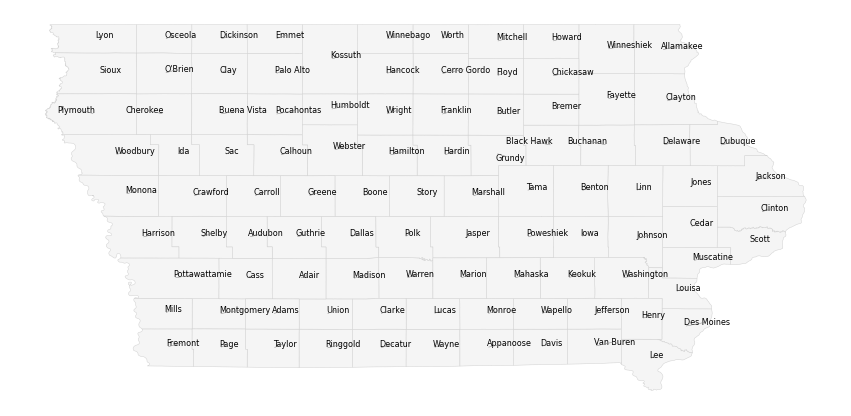

In [64]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
ax.set_axis_off(); # turns off axis labels

In [65]:
type(iowa_pop_gdf)
type(iowa_pop_stores_gdf)

geopandas.geodataframe.GeoDataFrame

### create Choropleth Map of Iowa

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


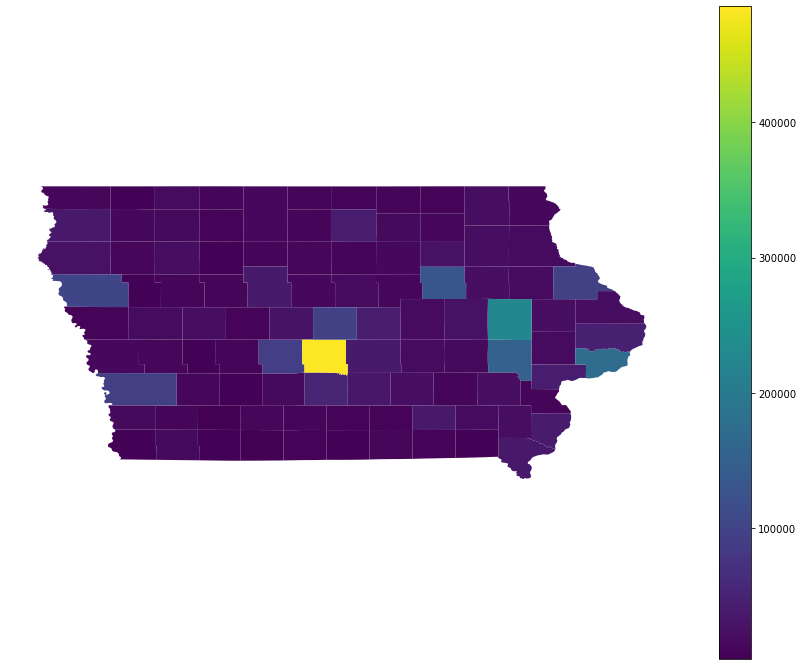

In [66]:
ax = iowa_pop_gdf.plot(column='Population',legend = True, figsize = (15, 12))
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
ax.set_axis_off(); # turns off axis labels

In [67]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

iowa_pop_gdf[['name','Population']].sort_values(by='Population', ascending=False)


,name,Population
46,Polk,485418
36,Linn,225601
34,Scott,172938
10,Johnson,150819
16,Black Hawk,131813
35,Woodbury,102687
68,Story,97355
90,Dubuque,97193
47,Pottawattamie,93478
9,Dallas,90418


In [68]:
# miss_cols(iowa_pop_stores_gdf) #left

In [69]:
# miss_cols(iowa_pop_stores_gdf) #right

In [70]:
# right join
# iowa_pop_stores_gdf.loc[iowa_pop_stores_gdf.name.isna(),'county_check' ]

### heat map of stores in Iowa

In [71]:
# left join
iowa_pop_stores_gdf.loc[iowa_pop_stores_gdf.Store_Number.isna(), 'name' ]

Series([], Name: name, dtype: object)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


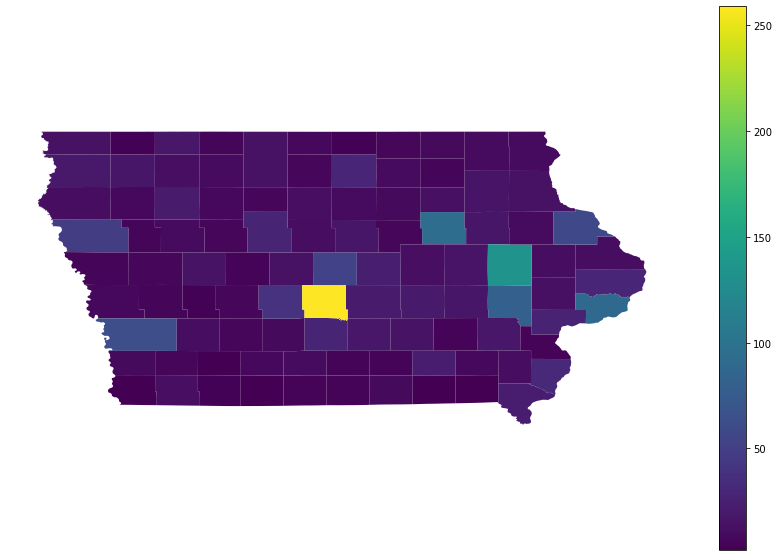

In [72]:
ax = iowa_pop_stores_gdf.plot(column='Store_Number',legend = True, figsize=(15, 10))
ax.set_axis_off(); # turns off axis labels